In [1]:
#import the correct packages
from plantcv import plantcv as pcv

import matplotlib
import cv2
import numpy as np
import argparse 
from  matplotlib import pyplot as plt
import os
from skimage import exposure, img_as_float
%matplotlib notebook
pcv.params.debug = "plot"




# CHANGE PATH BELOW

In [2]:
class options:
    def __init__(self):
        # Input image path/filename --------------------- CHANGE THIS LINE BELOW ---------------------
        self.image = "/shares/mgehan_share/raw_data/raw_image/microscopy_images/katie_stomata/11122021/1d/20x_hlp_1d_2_003.tif"
        # Debug mode = None, "plot", or "print"
        self.debug = "plot"
        # Store output images (True/False)
        self.writeimg = False
        # Results path/filename --------------------- CHANGE THIS LINE BELOW ---------------------
        self.result = "/shares/mgehan_share/kmurphy/tobacco/stomata/test.csv"
        # Image output directory path
        self.outdir = "/shares/mgehan_share/kmurphy/tobacco/stomata"

args = options()
pcv.params.debug_outdir = args.outdir
pcv.params.debug = args.debug

# Increase text size in plots
pcv.params.text_size = 20
pcv.params.text_thickness = 10


<IPython.core.display.Javascript object>


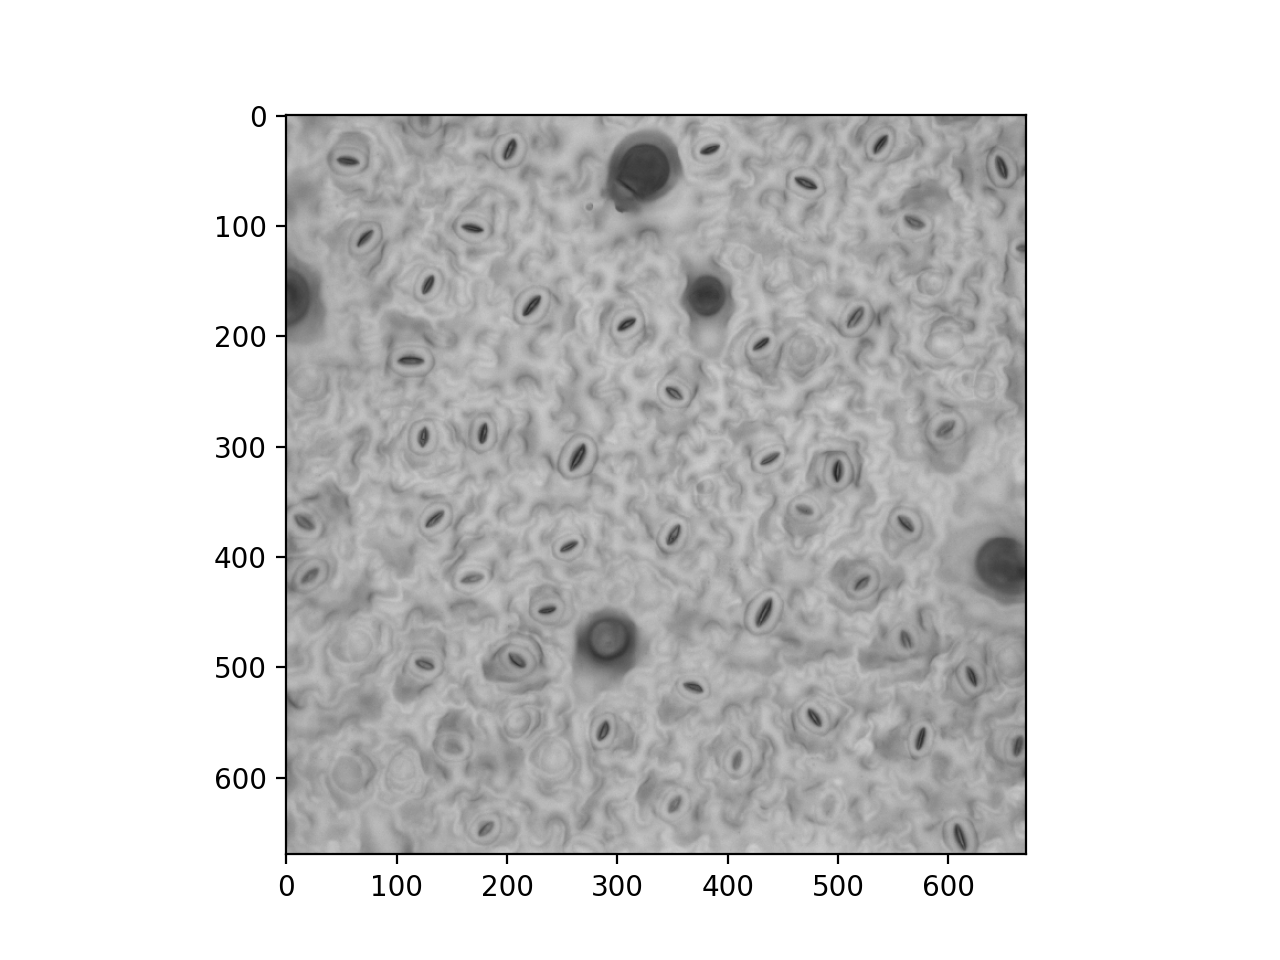

In [3]:
img, path, filename = pcv.readimage(filename=args.image)

In [4]:
# Update params related to plotting so we can see better 
#pcv.params.text_size=50
#pcv.params.text_thickness=15

#colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

<IPython.core.display.Javascript object>


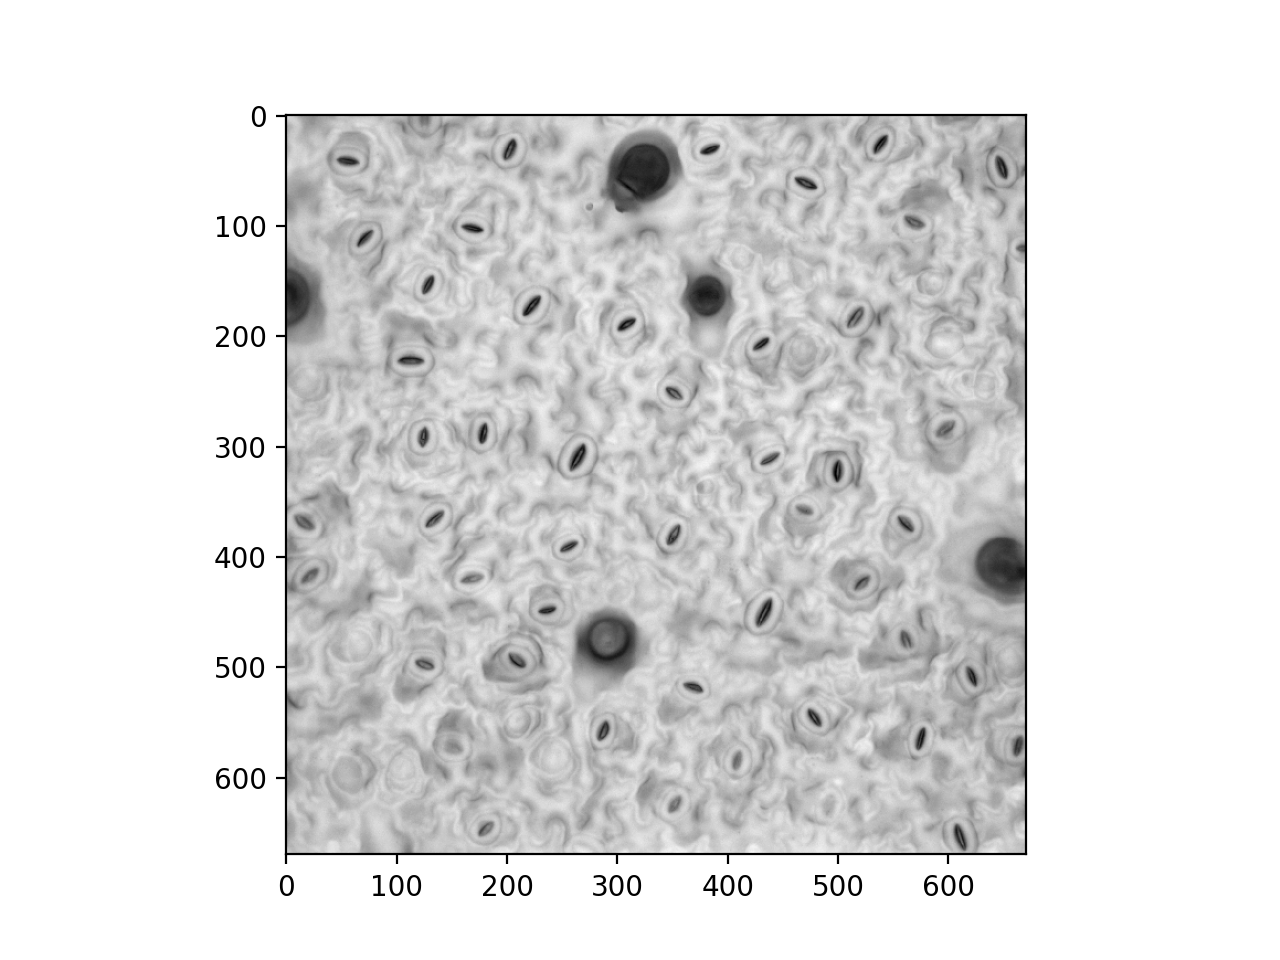

In [5]:
l = pcv.rgb2gray_lab(rgb_img=img, channel='l')


<IPython.core.display.Javascript object>


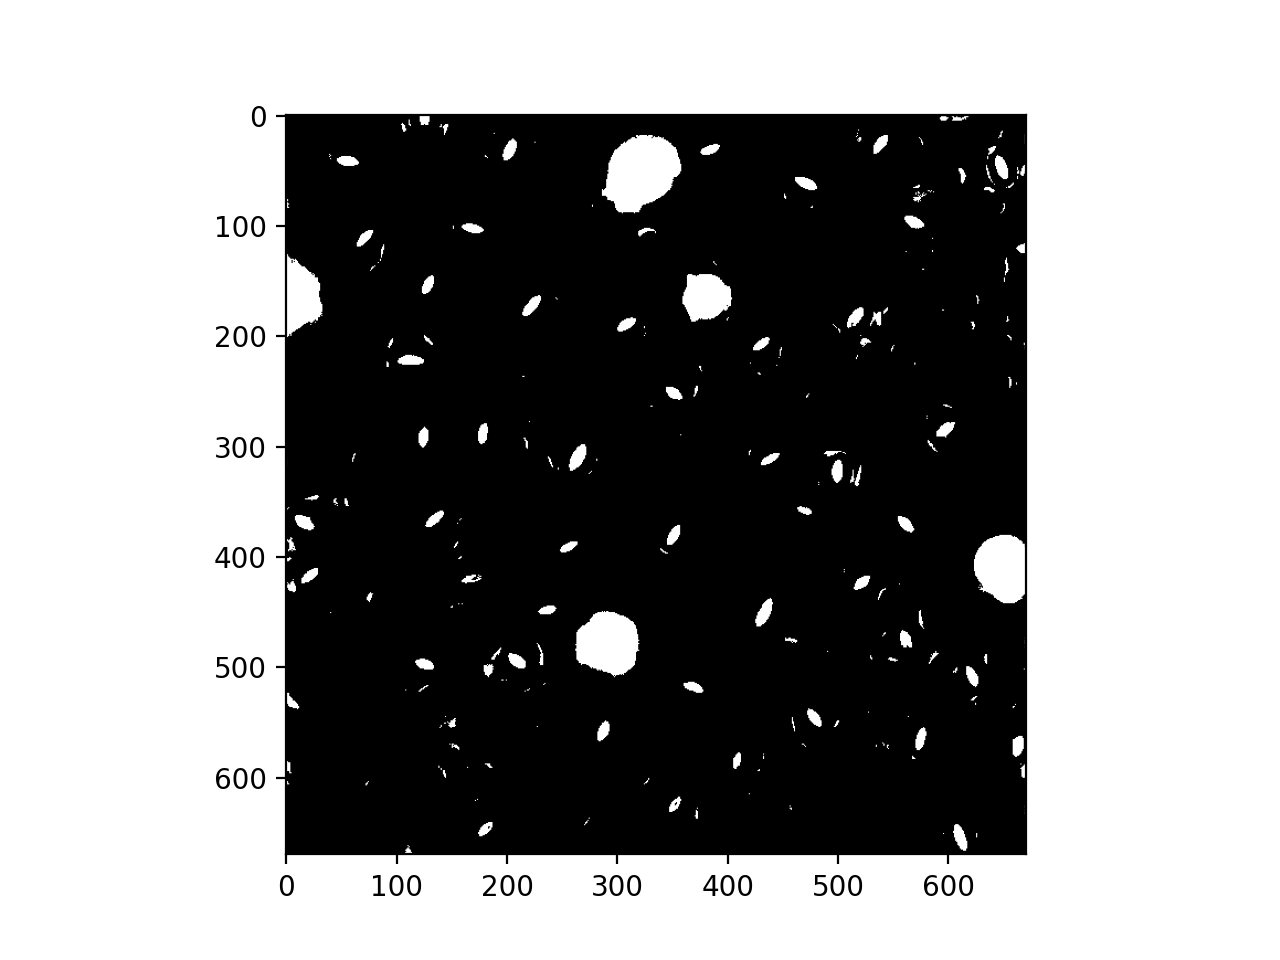

In [6]:
# Threshold the blue channel image 
l_thresh = pcv.threshold.binary(gray_img=l, threshold=135, max_value=255, 
                                object_type='dark')

<IPython.core.display.Javascript object>


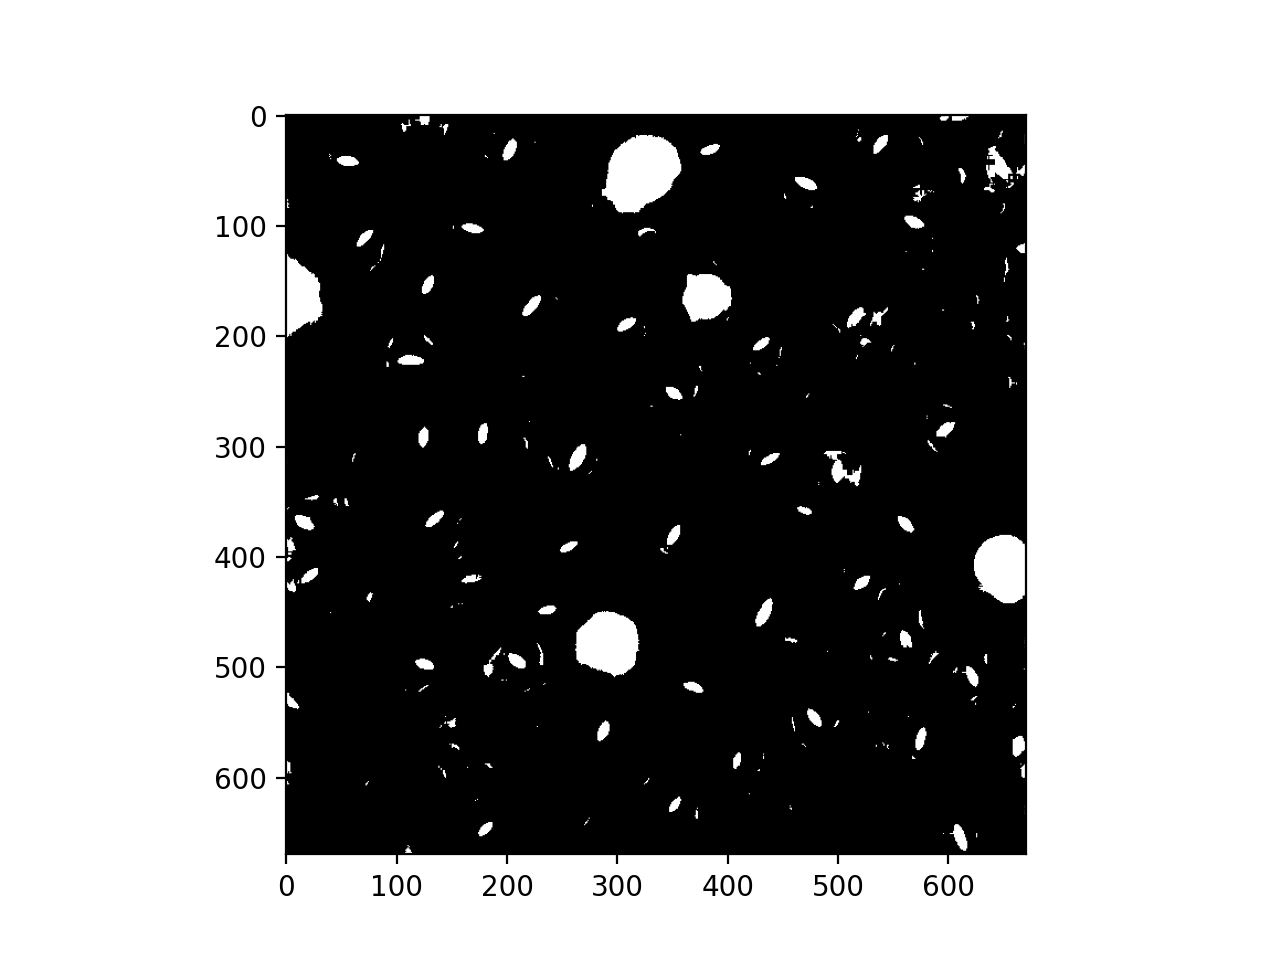

In [7]:
# Fill in small objects 
cross_kernel = pcv.get_kernel(size=(10,10), shape="cross")
l_fill_image = pcv.closing(gray_img=l_thresh, kernel = cross_kernel)

<IPython.core.display.Javascript object>


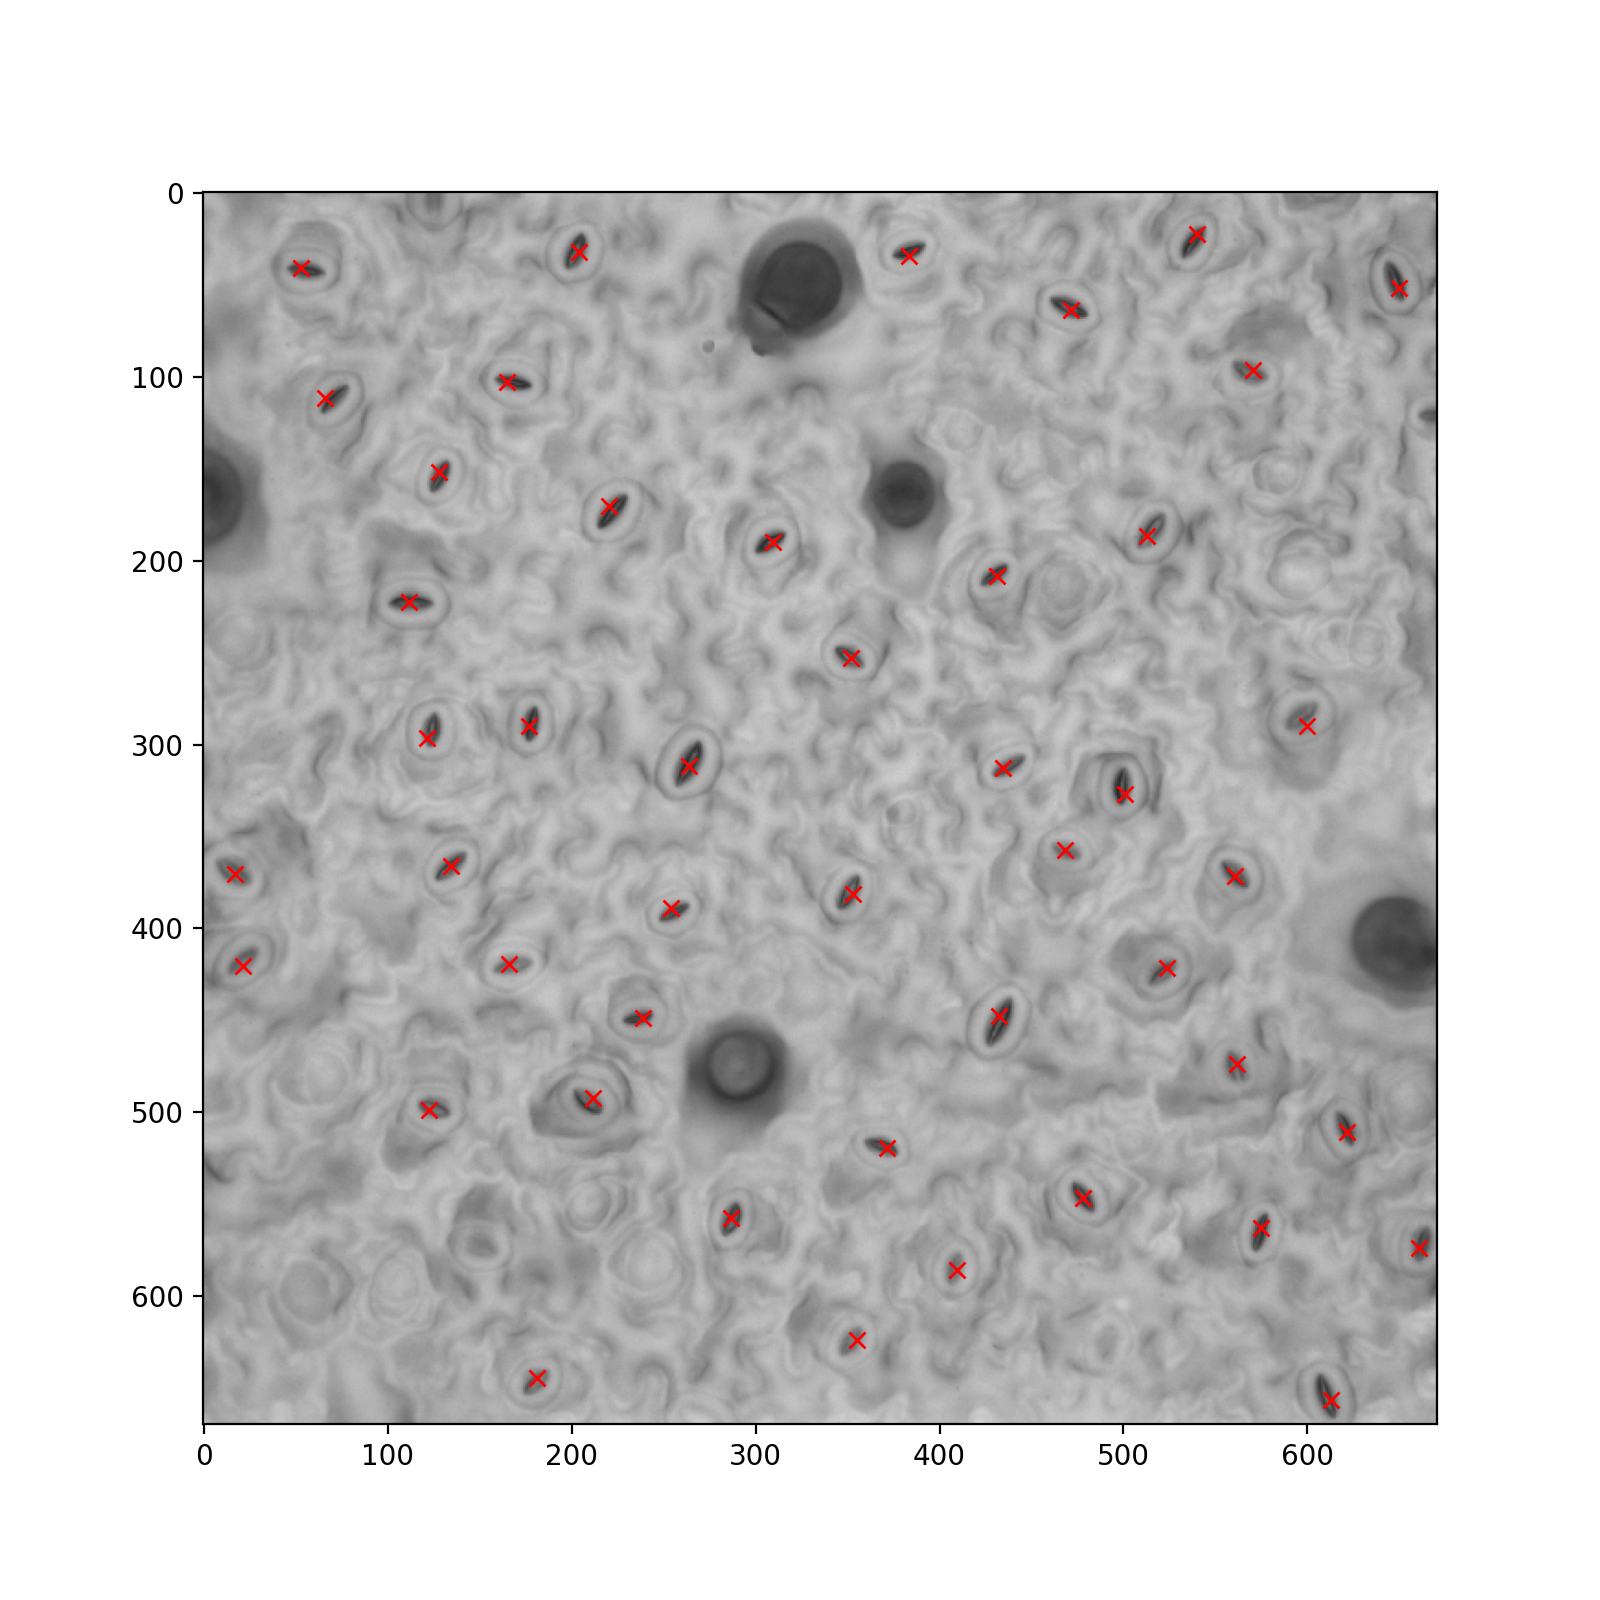

In [8]:
#collect points for center of ROIs
marker = pcv.Points(img, figsize=(8,8))

<IPython.core.display.Javascript object>


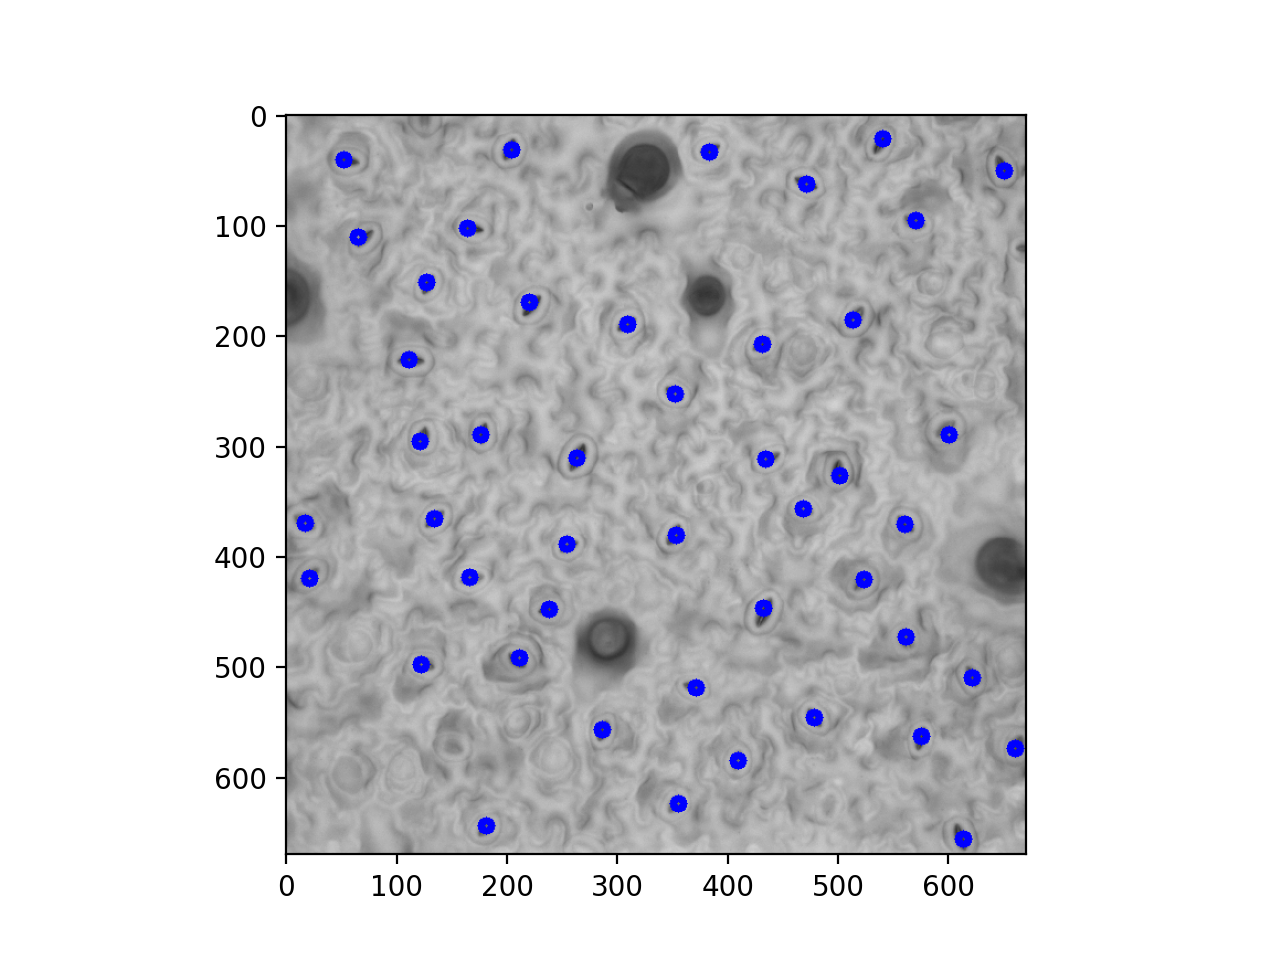

In [9]:
%matplotlib notebook
pcv.params.debug = "plot"
# Create ROI based on the selected points
roi_objects = pcv.roi.multi(img=img, coord=marker.points, radius=5)

In [10]:
# write this in the google doc! 
len(marker.points)

46

<IPython.core.display.Javascript object>


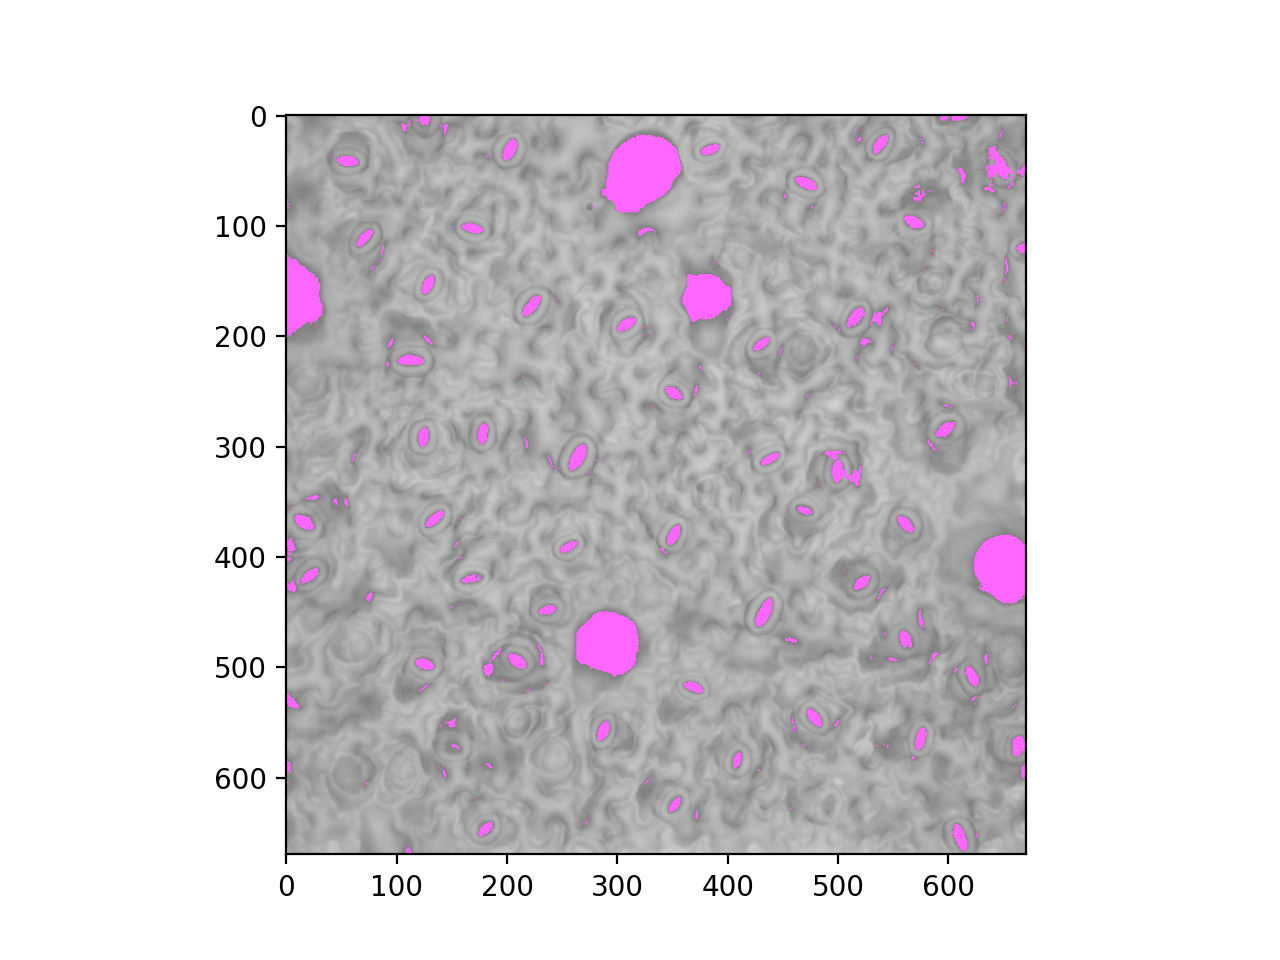

In [11]:
# Identify objects

# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=l_fill_image)

# CHANGE THE LABEL NAME IN THE BELOW CODE, SEE THE COMMENT FOR WHERE TO CHANGE AND LEAVE THE LAST _

<IPython.core.display.Javascript object>


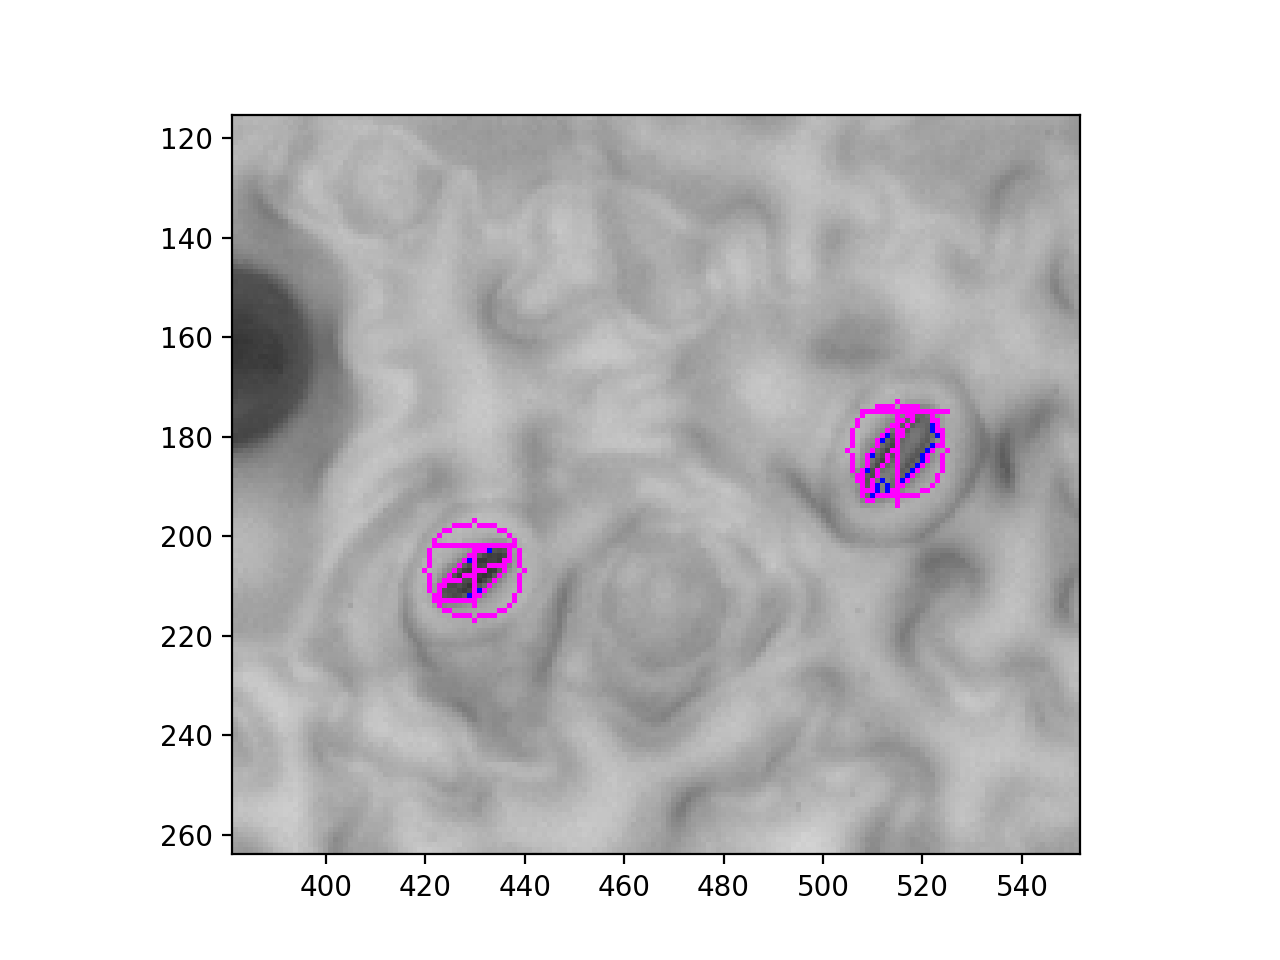

In [12]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)

img_copy = np.copy(img)
pcv.params.debug = "none"
pcv.params.line_thickness = 1
i = 0

mask_all_stomata = np.zeros(l_fill_image.shape, dtype=np.uint8)

for roi, hierarchy in roi_objects:
    # Find objects in the ROIs
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=id_objects, 
        obj_hierarchy=obj_hierarchy)
    
    mask_all_stomata = mask_all_stomata + filtered_mask
    
    # Combine objects together in each plant     
    plant_contour, plant_mask = pcv.object_composition(img=img_copy, contours=filtered_contours, hierarchy=filtered_hierarchy)        
    
    # Analyze the shape of each plant --------------------- CHANGE THIS LINE BELOW ---------------------
    img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=f"1201_C_HLP_1_001_{i}")
    i = i + 1
    
#pcv.outputs.save_results(filename=args.result, outformat = "csv")

pcv.plot_image(img_copy)

In [13]:
#--------------------- 
pcv.print_image(mask_all_stomata, filename = os.path.join(args.outdir, filename[:-4] + '_mask.png' ))

In [13]:
pcv.outputs.clear()

In [14]:
import os
import glob
import pandas as pd

In [15]:
path = '/shares/mgehan_share/kmurphy/tobacco/stomata/results_12142022'
os.chdir(path)

all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "02112023_combined.csv", index=False, encoding='utf-8-sig')